## Figure 8. Comparing RDD for different network depths

Imports

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

#%matplotlib inline

import matplotlib
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import numpy.random as rand
import pandas as pd
import seaborn as sns

from lib.lif import LIF_Recurrent, ParamsLIF_Recurrent
from lib.causal import causaleffect_maxv, causaleffect_maxv_linear, causaleffect_maxv_sp

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Angle between two vectors
def alignment(a,b):
    da = np.dot(a,a)
    db = np.dot(b,b)
    if da > 0 and db > 0:
        return 180/np.pi*np.arccos(np.dot(a,b)/np.sqrt(da*db))
    else:
        return 360.
    
def mse(pred,true):
    return np.mean((pred - true)**2)

In [3]:
#Test LIF_Recurrent network
nsims = 1

cvals = [0.0, 0.7]
pvals = np.logspace(-2, 0, 10)
#c = 0.9
n1 = 10
n2 = 10
tau_s = 0.020
dt = 0.001
t = 100    #In seconds
sigma = 10
x = 0
#p = 0.1
DeltaT = 10

nC = len(cvals)
nP = len(pvals)

t_filter = np.linspace(0, 1, 2000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]

params = ParamsLIF_Recurrent(exp_filter, sigma = sigma, n1 = n1, n2 = n2)
lif = LIF_Recurrent(params, t = t)

## Test 2 hidden layer network

In [4]:
results = lif.simulate()
np.nonzero(results[1][0,:])[0].shape

(17140,)

In [5]:
print('Firing rates:',np.sum(results[1], 1)/t)

('Firing rates:', array([ 34.28 ,  34.294,  34.298,  34.352,  34.382,  34.33 ,  34.266,
        34.278,  34.372,  34.178,  53.904,  13.868,   3.966,  40.81 ,
        40.014,  45.416,  39.236,  24.162,  19.118,  18.79 ]))


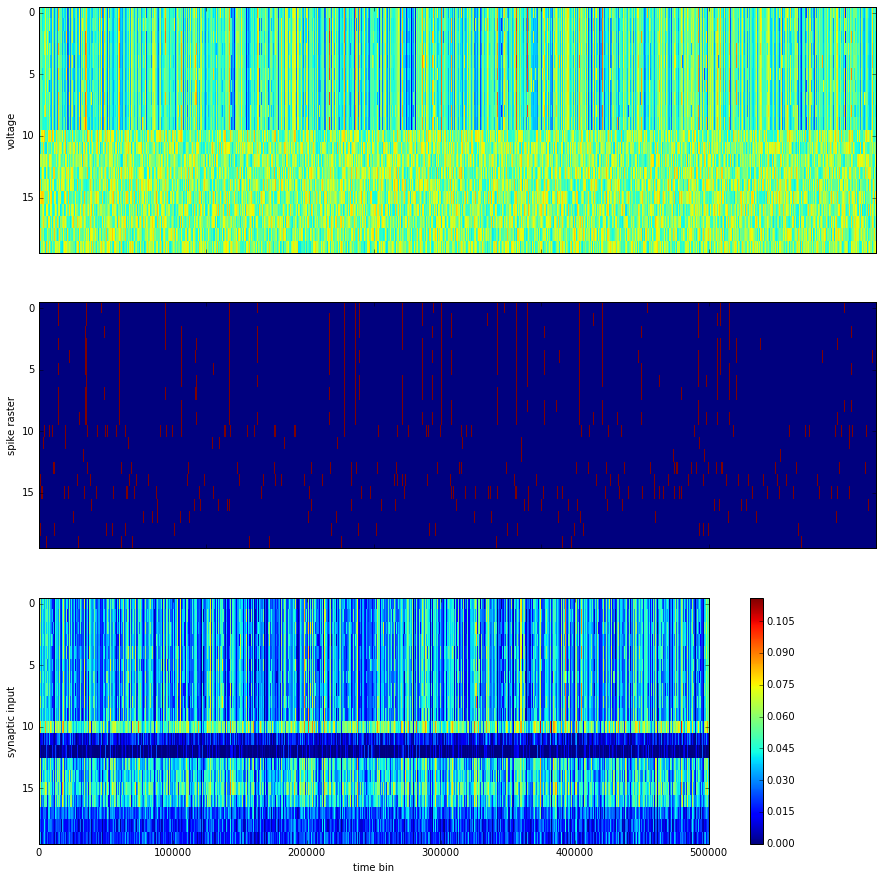

In [6]:
fig, axes = plt.subplots(3,1,figsize = (15, 15), sharex = True)
axes[0].imshow(results[0], aspect = 'auto', interpolation = 'nearest')
axes[1].imshow(results[1], aspect = 'auto', interpolation = 'nearest')
im2 = axes[2].imshow(results[3], aspect = 'auto', interpolation = 'nearest')
axes[0].set_ylabel('voltage')
axes[1].set_ylabel('spike raster')
axes[2].set_ylabel('synaptic input')
axes[2].set_xlabel('time bin')
plt.colorbar(im2, ax = axes[2])

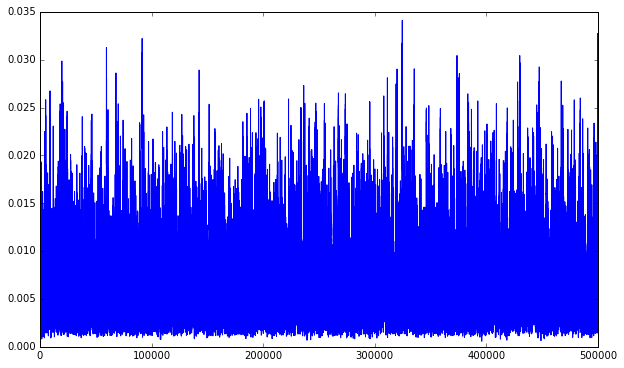

In [16]:
cost = C_orig(results[3][n1:,:])
plt.plot(cost)

## Causal effect estimation

In [4]:
U = np.eye(n2)
target = .02*np.ones((n2,1))
target[0] = 0
C_orig = lambda s: np.sum((np.dot(U, s) - target)**2,0)
nsims = 50
beta_rd_c = np.zeros((nC, nsims, nP, n1))
beta_rd_c_linear = np.zeros((nC, nsims, nP, n1))
beta_fd_c = np.zeros((nC, nsims, nP, n1))
beta_fd_c_linear = np.zeros((nC, nsims, nP, n1))

In [5]:
#Compute causal effects
for i,c in enumerate(cvals):
    print("Running %d simulations with c=%s"%(nsims, c))
    params.c = c
    lif.setup(params)
    for j in range(nsims):
        (v, h, u, sh) = lif.simulate(DeltaT)
        cost = C_orig(sh[n1:,:])
        for k,p in enumerate(pvals):
            #a = causaleffect_maxv(u[0:n1,:], cost, DeltaT, p, params)
            #print(a.shape)
            beta_rd_c[i,j,k,:] = causaleffect_maxv(u[0:n1,:], cost, DeltaT, p, params)
            beta_rd_c_linear[i,j,k,:] = causaleffect_maxv_linear(u[0:n1,:], cost, DeltaT, p, params)
        beta_fd_c[i,j,:] = causaleffect_maxv(u[0:n1,:], cost, DeltaT, 1, params)
        beta_fd_c_linear[i,j,:] = causaleffect_maxv_linear(u[0:n1,:], cost, DeltaT, 1, params)

Running 50 simulations with c=0.0
('Above', 65)
('Below', 78)
('Above', 62)
('Below', 81)
('Above', 70)
('Below', 69)
('Above', 52)
('Below', 66)
('Above', 59)
('Below', 65)
('Above', 80)
('Below', 69)
('Above', 68)
('Below', 72)
('Above', 55)
('Below', 64)
('Above', 64)
('Below', 63)
('Above', 53)
('Below', 89)
('Above', 101)
('Below', 118)
('Above', 114)
('Below', 121)
('Above', 111)
('Below', 118)
('Above', 92)
('Below', 121)
('Above', 97)
('Below', 113)
('Above', 129)
('Below', 117)
('Above', 113)
('Below', 116)
('Above', 100)
('Below', 112)
('Above', 100)
('Below', 118)
('Above', 104)
('Below', 139)
('Above', 178)
('Below', 188)
('Above', 193)
('Below', 201)
('Above', 180)
('Below', 182)
('Above', 169)
('Below', 208)
('Above', 161)
('Below', 182)
('Above', 201)
('Below', 204)
('Above', 180)
('Below', 185)
('Above', 168)
('Below', 191)
('Above', 182)
('Below', 192)
('Above', 194)
('Below', 212)
('Above', 283)
('Below', 315)
('Above', 315)
('Below', 337)
('Above', 283)
('Below', 315

('Above', 68)
('Below', 59)
('Above', 47)
('Below', 59)
('Above', 60)
('Below', 67)
('Above', 59)
('Below', 79)
('Above', 65)
('Below', 51)
('Above', 72)
('Below', 54)
('Above', 55)
('Below', 67)
('Above', 71)
('Below', 81)
('Above', 65)
('Below', 77)
('Above', 71)
('Below', 69)
('Above', 105)
('Below', 108)
('Above', 91)
('Below', 103)
('Above', 124)
('Below', 116)
('Above', 103)
('Below', 121)
('Above', 114)
('Below', 90)
('Above', 139)
('Below', 107)
('Above', 117)
('Below', 115)
('Above', 104)
('Below', 126)
('Above', 103)
('Below', 118)
('Above', 131)
('Below', 107)
('Above', 177)
('Below', 174)
('Above', 166)
('Below', 178)
('Above', 191)
('Below', 202)
('Above', 171)
('Below', 189)
('Above', 190)
('Below', 160)
('Above', 205)
('Below', 175)
('Above', 184)
('Below', 178)
('Above', 174)
('Below', 189)
('Above', 165)
('Below', 186)
('Above', 195)
('Below', 164)
('Above', 294)
('Below', 292)
('Above', 269)
('Below', 315)
('Above', 310)
('Below', 301)
('Above', 282)
('Below', 319)
('

('Above', 66)
('Below', 65)
('Above', 45)
('Below', 63)
('Above', 68)
('Below', 70)
('Above', 59)
('Below', 78)
('Above', 61)
('Below', 50)
('Above', 73)
('Below', 58)
('Above', 68)
('Below', 70)
('Above', 73)
('Below', 65)
('Above', 66)
('Below', 65)
('Above', 71)
('Below', 69)
('Above', 118)
('Below', 106)
('Above', 76)
('Below', 97)
('Above', 108)
('Below', 106)
('Above', 96)
('Below', 119)
('Above', 95)
('Below', 84)
('Above', 112)
('Below', 103)
('Above', 115)
('Below', 118)
('Above', 117)
('Below', 108)
('Above', 110)
('Below', 109)
('Above', 116)
('Below', 120)
('Above', 182)
('Below', 184)
('Above', 149)
('Below', 177)
('Above', 184)
('Below', 191)
('Above', 169)
('Below', 186)
('Above', 172)
('Below', 149)
('Above', 189)
('Below', 196)
('Above', 185)
('Below', 200)
('Above', 187)
('Below', 184)
('Above', 183)
('Below', 190)
('Above', 165)
('Below', 202)
('Above', 277)
('Below', 296)
('Above', 249)
('Below', 309)
('Above', 288)
('Below', 302)
('Above', 296)
('Below', 319)
('Abo

('Above', 69)
('Below', 59)
('Above', 58)
('Below', 85)
('Above', 58)
('Below', 64)
('Above', 67)
('Below', 67)
('Above', 72)
('Below', 77)
('Above', 57)
('Below', 67)
('Above', 61)
('Below', 58)
('Above', 69)
('Below', 75)
('Above', 54)
('Below', 64)
('Above', 53)
('Below', 62)
('Above', 113)
('Below', 108)
('Above', 109)
('Below', 139)
('Above', 103)
('Below', 113)
('Above', 108)
('Below', 118)
('Above', 121)
('Below', 124)
('Above', 119)
('Below', 104)
('Above', 112)
('Below', 117)
('Above', 123)
('Below', 127)
('Above', 102)
('Below', 95)
('Above', 93)
('Below', 111)
('Above', 186)
('Below', 172)
('Above', 170)
('Below', 212)
('Above', 174)
('Below', 180)
('Above', 183)
('Below', 203)
('Above', 197)
('Below', 223)
('Above', 191)
('Below', 174)
('Above', 185)
('Below', 176)
('Above', 182)
('Below', 196)
('Above', 164)
('Below', 193)
('Above', 173)
('Below', 196)
('Above', 313)
('Below', 302)
('Above', 290)
('Below', 328)
('Above', 285)
('Below', 295)
('Above', 299)
('Below', 336)
('

('Above', 3166)
('Below', 6542)
('Above', 3135)
('Below', 6591)
('Above', 3110)
('Below', 6616)
('Above', 3089)
('Below', 6636)
('Above', 3165)
('Below', 6533)
('Above', 3197)
('Below', 6488)
('Above', 3106)
('Below', 6605)
('Above', 3063)
('Below', 6644)
('Above', 3149)
('Below', 6552)
('Above', 3141)
('Below', 6576)
('Above', 3166)
('Below', 6542)
('Above', 3135)
('Below', 6591)
('Above', 3110)
('Below', 6616)
('Above', 3089)
('Below', 6636)
('Above', 70)
('Below', 58)
('Above', 67)
('Below', 69)
('Above', 55)
('Below', 69)
('Above', 67)
('Below', 78)
('Above', 68)
('Below', 59)
('Above', 56)
('Below', 75)
('Above', 47)
('Below', 71)
('Above', 60)
('Below', 66)
('Above', 73)
('Below', 65)
('Above', 68)
('Below', 85)
('Above', 117)
('Below', 106)
('Above', 106)
('Below', 122)
('Above', 99)
('Below', 121)
('Above', 100)
('Below', 118)
('Above', 109)
('Below', 105)
('Above', 106)
('Below', 115)
('Above', 96)
('Below', 112)
('Above', 97)
('Below', 122)
('Above', 116)
('Below', 111)
('Abo

('Above', 56)
('Below', 52)
('Above', 71)
('Below', 61)
('Above', 63)
('Below', 61)
('Above', 57)
('Below', 57)
('Above', 58)
('Below', 65)
('Above', 79)
('Below', 75)
('Above', 68)
('Below', 60)
('Above', 65)
('Below', 71)
('Above', 76)
('Below', 75)
('Above', 50)
('Below', 56)
('Above', 84)
('Below', 91)
('Above', 115)
('Below', 112)
('Above', 110)
('Below', 102)
('Above', 117)
('Below', 105)
('Above', 98)
('Below', 106)
('Above', 123)
('Below', 116)
('Above', 106)
('Below', 96)
('Above', 106)
('Below', 110)
('Above', 115)
('Below', 118)
('Above', 97)
('Below', 95)
('Above', 162)
('Below', 165)
('Above', 181)
('Below', 196)
('Above', 172)
('Below', 174)
('Above', 209)
('Below', 176)
('Above', 174)
('Below', 186)
('Above', 183)
('Below', 187)
('Above', 158)
('Below', 179)
('Above', 167)
('Below', 192)
('Above', 180)
('Below', 209)
('Above', 166)
('Below', 175)
('Above', 282)
('Below', 277)
('Above', 295)
('Below', 317)
('Above', 279)
('Below', 289)
('Above', 321)
('Below', 291)
('Abov

('Above', 68)
('Below', 68)
('Above', 59)
('Below', 68)
('Above', 55)
('Below', 68)
('Above', 58)
('Below', 65)
('Above', 56)
('Below', 61)
('Above', 59)
('Below', 63)
('Above', 70)
('Below', 51)
('Above', 67)
('Below', 68)
('Above', 62)
('Below', 70)
('Above', 72)
('Below', 73)
('Above', 117)
('Below', 102)
('Above', 102)
('Below', 117)
('Above', 95)
('Below', 100)
('Above', 111)
('Below', 110)
('Above', 100)
('Below', 119)
('Above', 100)
('Below', 108)
('Above', 109)
('Below', 79)
('Above', 108)
('Below', 120)
('Above', 104)
('Below', 118)
('Above', 116)
('Below', 105)
('Above', 180)
('Below', 178)
('Above', 180)
('Below', 181)
('Above', 158)
('Below', 185)
('Above', 168)
('Below', 175)
('Above', 165)
('Below', 187)
('Above', 161)
('Below', 173)
('Above', 174)
('Below', 158)
('Above', 180)
('Below', 190)
('Above', 177)
('Below', 186)
('Above', 193)
('Below', 176)
('Above', 296)
('Below', 284)
('Above', 297)
('Below', 310)
('Above', 275)
('Below', 318)
('Above', 285)
('Below', 320)
('

('Above', 65)
('Below', 70)
('Above', 60)
('Below', 62)
('Above', 59)
('Below', 71)
('Above', 58)
('Below', 54)
('Above', 64)
('Below', 63)
('Above', 62)
('Below', 62)
('Above', 62)
('Below', 57)
('Above', 59)
('Below', 69)
('Above', 64)
('Below', 66)
('Above', 69)
('Below', 61)
('Above', 115)
('Below', 121)
('Above', 99)
('Below', 102)
('Above', 100)
('Below', 117)
('Above', 89)
('Below', 94)
('Above', 116)
('Below', 114)
('Above', 102)
('Below', 110)
('Above', 110)
('Below', 96)
('Above', 86)
('Below', 127)
('Above', 101)
('Below', 114)
('Above', 111)
('Below', 102)
('Above', 185)
('Below', 179)
('Above', 167)
('Below', 180)
('Above', 167)
('Below', 185)
('Above', 167)
('Below', 170)
('Above', 185)
('Below', 199)
('Above', 168)
('Below', 181)
('Above', 183)
('Below', 173)
('Above', 168)
('Below', 207)
('Above', 177)
('Below', 186)
('Above', 183)
('Below', 166)
('Above', 298)
('Below', 316)
('Above', 275)
('Below', 306)
('Above', 271)
('Below', 304)
('Above', 285)
('Below', 291)
('Abo

('Above', 65)
('Below', 70)
('Above', 63)
('Below', 63)
('Above', 49)
('Below', 67)
('Above', 59)
('Below', 71)
('Above', 58)
('Below', 79)
('Above', 67)
('Below', 50)
('Above', 65)
('Below', 55)
('Above', 60)
('Below', 64)
('Above', 69)
('Below', 67)
('Above', 66)
('Below', 68)
('Above', 101)
('Below', 111)
('Above', 125)
('Below', 113)
('Above', 93)
('Below', 116)
('Above', 107)
('Below', 126)
('Above', 99)
('Below', 124)
('Above', 111)
('Below', 89)
('Above', 109)
('Below', 100)
('Above', 102)
('Below', 116)
('Above', 121)
('Below', 116)
('Above', 106)
('Below', 102)
('Above', 172)
('Below', 175)
('Above', 203)
('Below', 184)
('Above', 156)
('Below', 194)
('Above', 181)
('Below', 198)
('Above', 156)
('Below', 196)
('Above', 189)
('Below', 181)
('Above', 180)
('Below', 185)
('Above', 175)
('Below', 188)
('Above', 195)
('Below', 179)
('Above', 174)
('Below', 171)
('Above', 285)
('Below', 316)
('Above', 312)
('Below', 319)
('Above', 258)
('Below', 313)
('Above', 307)
('Below', 336)
('A

('Above', 63)
('Below', 58)
('Above', 56)
('Below', 62)
('Above', 70)
('Below', 56)
('Above', 52)
('Below', 74)
('Above', 71)
('Below', 69)
('Above', 58)
('Below', 57)
('Above', 56)
('Below', 63)
('Above', 66)
('Below', 58)
('Above', 65)
('Below', 53)
('Above', 60)
('Below', 79)
('Above', 107)
('Below', 104)
('Above', 99)
('Below', 101)
('Above', 121)
('Below', 111)
('Above', 82)
('Below', 117)
('Above', 120)
('Below', 118)
('Above', 100)
('Below', 103)
('Above', 90)
('Below', 107)
('Above', 114)
('Below', 93)
('Above', 107)
('Below', 101)
('Above', 108)
('Below', 131)
('Above', 177)
('Below', 180)
('Above', 168)
('Below', 183)
('Above', 190)
('Below', 200)
('Above', 146)
('Below', 191)
('Above', 197)
('Below', 196)
('Above', 173)
('Below', 170)
('Above', 164)
('Below', 182)
('Above', 189)
('Below', 163)
('Above', 184)
('Below', 179)
('Above', 190)
('Below', 199)
('Above', 285)
('Below', 324)
('Above', 267)
('Below', 300)
('Above', 315)
('Below', 348)
('Above', 274)
('Below', 332)
('Ab

('Above', 3081)
('Below', 6639)
('Above', 3076)
('Below', 6633)
('Above', 3157)
('Below', 6551)
('Above', 3131)
('Below', 6572)
('Above', 3070)
('Below', 6674)
('Above', 3182)
('Below', 6523)
('Above', 2998)
('Below', 6740)
('Above', 3085)
('Below', 6645)
('Above', 3108)
('Below', 6624)
('Above', 3055)
('Below', 6633)
('Above', 48)
('Below', 70)
('Above', 67)
('Below', 86)
('Above', 59)
('Below', 66)
('Above', 56)
('Below', 70)
('Above', 55)
('Below', 71)
('Above', 74)
('Below', 68)
('Above', 69)
('Below', 76)
('Above', 60)
('Below', 70)
('Above', 77)
('Below', 65)
('Above', 56)
('Below', 59)
('Above', 82)
('Below', 130)
('Above', 110)
('Below', 142)
('Above', 107)
('Below', 112)
('Above', 92)
('Below', 110)
('Above', 94)
('Below', 126)
('Above', 118)
('Below', 109)
('Above', 105)
('Below', 115)
('Above', 106)
('Below', 115)
('Above', 118)
('Below', 115)
('Above', 98)
('Below', 113)
('Above', 160)
('Below', 215)
('Above', 170)
('Below', 208)
('Above', 178)
('Below', 217)
('Above', 168)

('Above', 67)
('Below', 49)
('Above', 73)
('Below', 64)
('Above', 48)
('Below', 65)
('Above', 77)
('Below', 63)
('Above', 67)
('Below', 63)
('Above', 61)
('Below', 58)
('Above', 75)
('Below', 74)
('Above', 76)
('Below', 79)
('Above', 68)
('Below', 72)
('Above', 70)
('Below', 66)
('Above', 98)
('Below', 90)
('Above', 103)
('Below', 107)
('Above', 93)
('Below', 99)
('Above', 113)
('Below', 110)
('Above', 112)
('Below', 107)
('Above', 108)
('Below', 109)
('Above', 122)
('Below', 115)
('Above', 119)
('Below', 130)
('Above', 107)
('Below', 118)
('Above', 109)
('Below', 113)
('Above', 169)
('Below', 170)
('Above', 171)
('Below', 194)
('Above', 161)
('Below', 168)
('Above', 184)
('Below', 196)
('Above', 180)
('Below', 196)
('Above', 171)
('Below', 194)
('Above', 183)
('Below', 190)
('Above', 192)
('Below', 215)
('Above', 179)
('Below', 189)
('Above', 184)
('Below', 188)
('Above', 271)
('Below', 299)
('Above', 283)
('Below', 319)
('Above', 284)
('Below', 304)
('Above', 295)
('Below', 334)
('Ab

('Above', 3057)
('Below', 6665)
('Above', 3110)
('Below', 6591)
('Above', 3132)
('Below', 6583)
('Above', 3127)
('Below', 6590)
('Above', 3184)
('Below', 6538)
('Above', 3131)
('Below', 6578)
('Above', 3110)
('Below', 6612)
('Above', 3147)
('Below', 6569)
('Above', 3129)
('Below', 6576)
('Above', 3121)
('Below', 6572)
('Above', 3057)
('Below', 6665)
('Above', 3110)
('Below', 6591)
('Above', 3132)
('Below', 6583)
('Above', 3127)
('Below', 6590)
('Above', 3184)
('Below', 6538)
('Above', 3131)
('Below', 6578)
('Above', 3110)
('Below', 6612)
('Above', 3147)
('Below', 6569)
('Above', 3129)
('Below', 6576)
('Above', 3121)
('Below', 6572)
('Above', 59)
('Below', 67)
('Above', 68)
('Below', 56)
('Above', 59)
('Below', 83)
('Above', 70)
('Below', 69)
('Above', 67)
('Below', 72)
('Above', 51)
('Below', 67)
('Above', 54)
('Below', 62)
('Above', 77)
('Below', 64)
('Above', 64)
('Below', 77)
('Above', 66)
('Below', 71)
('Above', 98)
('Below', 117)
('Above', 113)
('Below', 94)
('Above', 106)
('Below

('Above', 3061)
('Below', 6646)
('Above', 3052)
('Below', 6630)
('Above', 3084)
('Below', 6611)
('Above', 3060)
('Below', 6657)
('Above', 3099)
('Below', 6609)
('Above', 3143)
('Below', 6571)
('Above', 3113)
('Below', 6616)
('Above', 3116)
('Below', 6600)
('Above', 3152)
('Below', 6573)
('Above', 3184)
('Below', 6541)
('Above', 3061)
('Below', 6646)
('Above', 3052)
('Below', 6630)
('Above', 3084)
('Below', 6611)
('Above', 3060)
('Below', 6657)
('Above', 3099)
('Below', 6609)
('Above', 3143)
('Below', 6571)
('Above', 3113)
('Below', 6616)
('Above', 3116)
('Below', 6600)
('Above', 3152)
('Below', 6573)
('Above', 3184)
('Below', 6541)
('Above', 58)
('Below', 66)
('Above', 53)
('Below', 60)
('Above', 63)
('Below', 52)
('Above', 68)
('Below', 48)
('Above', 75)
('Below', 65)
('Above', 73)
('Below', 60)
('Above', 60)
('Below', 76)
('Above', 60)
('Below', 71)
('Above', 70)
('Below', 71)
('Above', 57)
('Below', 64)
('Above', 109)
('Below', 126)
('Above', 97)
('Below', 106)
('Above', 117)
('Belo

('Above', 63)
('Below', 62)
('Above', 82)
('Below', 58)
('Above', 56)
('Below', 82)
('Above', 63)
('Below', 76)
('Above', 74)
('Below', 68)
('Above', 62)
('Below', 68)
('Above', 55)
('Below', 64)
('Above', 65)
('Below', 63)
('Above', 63)
('Below', 58)
('Above', 49)
('Below', 66)
('Above', 100)
('Below', 115)
('Above', 128)
('Below', 104)
('Above', 82)
('Below', 133)
('Above', 109)
('Below', 123)
('Above', 118)
('Below', 106)
('Above', 110)
('Below', 114)
('Above', 90)
('Below', 103)
('Above', 112)
('Below', 106)
('Above', 94)
('Below', 99)
('Above', 100)
('Below', 122)
('Above', 173)
('Below', 207)
('Above', 204)
('Below', 159)
('Above', 156)
('Below', 201)
('Above', 182)
('Below', 202)
('Above', 190)
('Below', 185)
('Above', 186)
('Below', 198)
('Above', 157)
('Below', 196)
('Above', 185)
('Below', 181)
('Above', 175)
('Below', 176)
('Above', 166)
('Below', 212)
('Above', 281)
('Below', 340)
('Above', 329)
('Below', 278)
('Above', 280)
('Below', 316)
('Above', 287)
('Below', 326)
('Ab

('Above', 53)
('Below', 67)
('Above', 77)
('Below', 66)
('Above', 70)
('Below', 71)
('Above', 63)
('Below', 65)
('Above', 58)
('Below', 64)
('Above', 77)
('Below', 63)
('Above', 58)
('Below', 72)
('Above', 61)
('Below', 82)
('Above', 59)
('Below', 62)
('Above', 92)
('Below', 60)
('Above', 95)
('Below', 121)
('Above', 120)
('Below', 103)
('Above', 106)
('Below', 116)
('Above', 103)
('Below', 113)
('Above', 102)
('Below', 100)
('Above', 119)
('Below', 101)
('Above', 102)
('Below', 128)
('Above', 101)
('Below', 119)
('Above', 112)
('Below', 99)
('Above', 132)
('Below', 115)
('Above', 177)
('Below', 198)
('Above', 186)
('Below', 170)
('Above', 184)
('Below', 200)
('Above', 169)
('Below', 197)
('Above', 173)
('Below', 160)
('Above', 205)
('Below', 171)
('Above', 185)
('Below', 216)
('Above', 194)
('Below', 187)
('Above', 188)
('Below', 174)
('Above', 188)
('Below', 194)
('Above', 286)
('Below', 314)
('Above', 309)
('Below', 286)
('Above', 298)
('Below', 319)
('Above', 280)
('Below', 339)
('

('Above', 64)
('Below', 64)
('Above', 63)
('Below', 64)
('Above', 71)
('Below', 52)
('Above', 50)
('Below', 68)
('Above', 75)
('Below', 68)
('Above', 69)
('Below', 81)
('Above', 67)
('Below', 59)
('Above', 64)
('Below', 57)
('Above', 57)
('Below', 44)
('Above', 77)
('Below', 64)
('Above', 100)
('Below', 122)
('Above', 97)
('Below', 106)
('Above', 116)
('Below', 100)
('Above', 96)
('Below', 105)
('Above', 119)
('Below', 112)
('Above', 108)
('Below', 128)
('Above', 107)
('Below', 108)
('Above', 113)
('Below', 100)
('Above', 107)
('Below', 85)
('Above', 125)
('Below', 120)
('Above', 159)
('Below', 194)
('Above', 174)
('Below', 193)
('Above', 174)
('Below', 169)
('Above', 173)
('Below', 181)
('Above', 197)
('Below', 183)
('Above', 174)
('Below', 208)
('Above', 180)
('Below', 188)
('Above', 171)
('Below', 176)
('Above', 185)
('Below', 163)
('Above', 187)
('Below', 188)
('Above', 277)
('Below', 324)
('Above', 295)
('Below', 324)
('Above', 317)
('Below', 293)
('Above', 295)
('Below', 325)
('A

('Above', 3119)
('Below', 6568)
('Above', 3067)
('Below', 6623)
('Above', 3070)
('Below', 6651)
('Above', 3126)
('Below', 6589)
('Above', 3082)
('Below', 6612)
('Above', 3138)
('Below', 6564)
('Above', 3118)
('Below', 6618)
('Above', 3135)
('Below', 6559)
('Above', 3127)
('Below', 6598)
('Above', 3088)
('Below', 6593)
('Above', 3119)
('Below', 6568)
('Above', 3067)
('Below', 6623)
('Above', 3070)
('Below', 6651)
('Above', 3126)
('Below', 6589)
('Above', 3082)
('Below', 6612)
('Above', 3138)
('Below', 6564)
('Above', 3118)
('Below', 6618)
('Above', 3135)
('Below', 6559)
('Above', 3127)
('Below', 6598)
('Above', 3088)
('Below', 6593)
('Above', 65)
('Below', 62)
('Above', 63)
('Below', 60)
('Above', 68)
('Below', 74)
('Above', 57)
('Below', 69)
('Above', 57)
('Below', 66)
('Above', 59)
('Below', 51)
('Above', 64)
('Below', 75)
('Above', 61)
('Below', 53)
('Above', 77)
('Below', 66)
('Above', 73)
('Below', 56)
('Above', 113)
('Below', 113)
('Above', 99)
('Below', 99)
('Above', 115)
('Below

('Above', 77)
('Below', 67)
('Above', 66)
('Below', 67)
('Above', 56)
('Below', 71)
('Above', 58)
('Below', 67)
('Above', 61)
('Below', 69)
('Above', 81)
('Below', 74)
('Above', 82)
('Below', 55)
('Above', 55)
('Below', 62)
('Above', 72)
('Below', 63)
('Above', 62)
('Below', 75)
('Above', 124)
('Below', 112)
('Above', 110)
('Below', 116)
('Above', 96)
('Below', 126)
('Above', 95)
('Below', 119)
('Above', 99)
('Below', 119)
('Above', 126)
('Below', 124)
('Above', 129)
('Below', 119)
('Above', 107)
('Below', 120)
('Above', 113)
('Below', 106)
('Above', 121)
('Below', 123)
('Above', 193)
('Below', 189)
('Above', 191)
('Below', 187)
('Above', 147)
('Below', 204)
('Above', 162)
('Below', 189)
('Above', 168)
('Below', 200)
('Above', 201)
('Below', 206)
('Above', 193)
('Below', 186)
('Above', 181)
('Below', 202)
('Above', 180)
('Below', 181)
('Above', 204)
('Below', 196)
('Above', 315)
('Below', 338)
('Above', 317)
('Below', 313)
('Above', 281)
('Below', 337)
('Above', 300)
('Below', 314)
('A

('Above', 56)
('Below', 59)
('Above', 66)
('Below', 65)
('Above', 65)
('Below', 58)
('Above', 57)
('Below', 79)
('Above', 70)
('Below', 72)
('Above', 63)
('Below', 69)
('Above', 55)
('Below', 58)
('Above', 85)
('Below', 63)
('Above', 65)
('Below', 69)
('Above', 70)
('Below', 60)
('Above', 85)
('Below', 110)
('Above', 110)
('Below', 110)
('Above', 109)
('Below', 100)
('Above', 94)
('Below', 128)
('Above', 116)
('Below', 116)
('Above', 115)
('Below', 105)
('Above', 99)
('Below', 104)
('Above', 139)
('Below', 99)
('Above', 112)
('Below', 104)
('Above', 106)
('Below', 102)
('Above', 163)
('Below', 186)
('Above', 180)
('Below', 179)
('Above', 180)
('Below', 163)
('Above', 146)
('Below', 199)
('Above', 197)
('Below', 203)
('Above', 174)
('Below', 185)
('Above', 165)
('Below', 172)
('Above', 208)
('Below', 168)
('Above', 180)
('Below', 182)
('Above', 175)
('Below', 185)
('Above', 288)
('Below', 319)
('Above', 299)
('Below', 321)
('Above', 302)
('Below', 303)
('Above', 270)
('Below', 336)
('Ab

('Above', 55)
('Below', 57)
('Above', 61)
('Below', 53)
('Above', 55)
('Below', 58)
('Above', 52)
('Below', 60)
('Above', 78)
('Below', 64)
('Above', 72)
('Below', 76)
('Above', 55)
('Below', 73)
('Above', 62)
('Below', 57)
('Above', 53)
('Below', 75)
('Above', 71)
('Below', 75)
('Above', 111)
('Below', 93)
('Above', 110)
('Below', 99)
('Above', 103)
('Below', 99)
('Above', 86)
('Below', 108)
('Above', 126)
('Below', 115)
('Above', 113)
('Below', 127)
('Above', 109)
('Below', 119)
('Above', 99)
('Below', 104)
('Above', 96)
('Below', 122)
('Above', 111)
('Below', 103)
('Above', 176)
('Below', 173)
('Above', 171)
('Below', 179)
('Above', 161)
('Below', 180)
('Above', 161)
('Below', 183)
('Above', 198)
('Below', 186)
('Above', 181)
('Below', 200)
('Above', 178)
('Below', 198)
('Above', 165)
('Below', 195)
('Above', 162)
('Below', 191)
('Above', 183)
('Below', 189)
('Above', 296)
('Below', 305)
('Above', 277)
('Below', 301)
('Above', 282)
('Below', 327)
('Above', 271)
('Below', 314)
('Abov

('Above', 3154)
('Below', 6550)
('Above', 3147)
('Below', 6548)
('Above', 3101)
('Below', 6609)
('Above', 3104)
('Below', 6598)
('Above', 3147)
('Below', 6591)
('Above', 3208)
('Below', 6514)
('Above', 3194)
('Below', 6509)
('Above', 3119)
('Below', 6611)
('Above', 3134)
('Below', 6549)
('Above', 3186)
('Below', 6539)
('Above', 3154)
('Below', 6550)
('Above', 3147)
('Below', 6548)
('Above', 3101)
('Below', 6609)
('Above', 3104)
('Below', 6598)
('Above', 3147)
('Below', 6591)
('Above', 3208)
('Below', 6514)
('Above', 3194)
('Below', 6509)
('Above', 3119)
('Below', 6611)
('Above', 3134)
('Below', 6549)
('Above', 3186)
('Below', 6539)
('Above', 83)
('Below', 67)
('Above', 77)
('Below', 57)
('Above', 60)
('Below', 61)
('Above', 67)
('Below', 62)
('Above', 61)
('Below', 67)
('Above', 57)
('Below', 63)
('Above', 67)
('Below', 67)
('Above', 67)
('Below', 57)
('Above', 67)
('Below', 75)
('Above', 62)
('Below', 76)
('Above', 134)
('Below', 105)
('Above', 121)
('Below', 103)
('Above', 107)
('Bel

('Above', 55)
('Below', 52)
('Above', 58)
('Below', 63)
('Above', 63)
('Below', 69)
('Above', 76)
('Below', 62)
('Above', 57)
('Below', 74)
('Above', 69)
('Below', 59)
('Above', 53)
('Below', 62)
('Above', 62)
('Below', 63)
('Above', 56)
('Below', 60)
('Above', 66)
('Below', 70)
('Above', 101)
('Below', 103)
('Above', 99)
('Below', 104)
('Above', 105)
('Below', 108)
('Above', 120)
('Below', 115)
('Above', 99)
('Below', 127)
('Above', 110)
('Below', 95)
('Above', 93)
('Below', 101)
('Above', 92)
('Below', 96)
('Above', 99)
('Below', 99)
('Above', 116)
('Below', 98)
('Above', 163)
('Below', 185)
('Above', 157)
('Below', 175)
('Above', 152)
('Below', 175)
('Above', 190)
('Below', 183)
('Above', 164)
('Below', 203)
('Above', 196)
('Below', 161)
('Above', 139)
('Below', 184)
('Above', 156)
('Below', 152)
('Above', 170)
('Below', 185)
('Above', 189)
('Below', 169)
('Above', 269)
('Below', 314)
('Above', 274)
('Below', 306)
('Above', 270)
('Below', 311)
('Above', 297)
('Below', 317)
('Above',

('Above', 78)
('Below', 54)
('Above', 86)
('Below', 55)
('Above', 68)
('Below', 59)
('Above', 59)
('Below', 69)
('Above', 67)
('Below', 68)
('Above', 78)
('Below', 57)
('Above', 72)
('Below', 65)
('Above', 82)
('Below', 55)
('Above', 69)
('Below', 71)
('Above', 62)
('Below', 83)
('Above', 124)
('Below', 90)
('Above', 129)
('Below', 100)
('Above', 119)
('Below', 106)
('Above', 108)
('Below', 117)
('Above', 108)
('Below', 113)
('Above', 123)
('Below', 105)
('Above', 110)
('Below', 111)
('Above', 124)
('Below', 99)
('Above', 112)
('Below', 114)
('Above', 98)
('Below', 130)
('Above', 195)
('Below', 166)
('Above', 193)
('Below', 172)
('Above', 190)
('Below', 192)
('Above', 181)
('Below', 182)
('Above', 171)
('Below', 187)
('Above', 183)
('Below', 189)
('Above', 179)
('Below', 170)
('Above', 218)
('Below', 177)
('Above', 175)
('Below', 198)
('Above', 168)
('Below', 202)
('Above', 302)
('Below', 300)
('Above', 300)
('Below', 296)
('Above', 313)
('Below', 337)
('Above', 308)
('Below', 308)
('A

('Above', 3082)
('Below', 6645)
('Above', 3048)
('Below', 6660)
('Above', 3010)
('Below', 6694)
('Above', 3067)
('Below', 6636)
('Above', 3110)
('Below', 6614)
('Above', 3054)
('Below', 6659)
('Above', 3072)
('Below', 6637)
('Above', 3073)
('Below', 6622)
('Above', 3074)
('Below', 6662)
('Above', 3006)
('Below', 6686)
('Above', 3082)
('Below', 6645)
('Above', 3048)
('Below', 6660)
('Above', 3010)
('Below', 6694)
('Above', 3067)
('Below', 6636)
('Above', 3110)
('Below', 6614)
('Above', 3054)
('Below', 6659)
('Above', 3072)
('Below', 6637)
('Above', 3073)
('Below', 6622)
('Above', 57)
('Below', 67)
('Above', 67)
('Below', 73)
('Above', 64)
('Below', 80)
('Above', 59)
('Below', 60)
('Above', 60)
('Below', 57)
('Above', 62)
('Below', 67)
('Above', 66)
('Below', 76)
('Above', 70)
('Below', 62)
('Above', 57)
('Below', 55)
('Above', 67)
('Below', 74)
('Above', 100)
('Below', 105)
('Above', 102)
('Below', 112)
('Above', 103)
('Below', 119)
('Above', 100)
('Below', 103)
('Above', 95)
('Below', 

('Above', 58)
('Below', 85)
('Above', 74)
('Below', 69)
('Above', 66)
('Below', 73)
('Above', 82)
('Below', 66)
('Above', 75)
('Below', 69)
('Above', 59)
('Below', 72)
('Above', 69)
('Below', 74)
('Above', 84)
('Below', 64)
('Above', 64)
('Below', 68)
('Above', 57)
('Below', 73)
('Above', 112)
('Below', 127)
('Above', 122)
('Below', 112)
('Above', 118)
('Below', 112)
('Above', 139)
('Below', 124)
('Above', 111)
('Below', 108)
('Above', 104)
('Below', 108)
('Above', 98)
('Below', 125)
('Above', 123)
('Below', 111)
('Above', 96)
('Below', 111)
('Above', 100)
('Below', 122)
('Above', 183)
('Below', 210)
('Above', 187)
('Below', 167)
('Above', 186)
('Below', 183)
('Above', 209)
('Below', 198)
('Above', 187)
('Below', 184)
('Above', 180)
('Below', 183)
('Above', 168)
('Below', 214)
('Above', 193)
('Below', 195)
('Above', 157)
('Below', 188)
('Above', 159)
('Below', 198)
('Above', 293)
('Below', 324)
('Above', 296)
('Below', 289)
('Above', 305)
('Below', 322)
('Above', 339)
('Below', 323)
('

('Above', 3145)
('Below', 6543)
('Above', 3113)
('Below', 6606)
('Above', 3096)
('Below', 6596)
('Above', 3162)
('Below', 6556)
('Above', 3121)
('Below', 6591)
('Above', 3114)
('Below', 6591)
('Above', 3106)
('Below', 6621)
('Above', 3088)
('Below', 6602)
('Above', 3090)
('Below', 6613)
('Above', 73)
('Below', 74)
('Above', 60)
('Below', 57)
('Above', 68)
('Below', 75)
('Above', 71)
('Below', 80)
('Above', 73)
('Below', 70)
('Above', 64)
('Below', 66)
('Above', 64)
('Below', 81)
('Above', 58)
('Below', 67)
('Above', 68)
('Below', 82)
('Above', 79)
('Below', 69)
('Above', 110)
('Below', 122)
('Above', 97)
('Below', 109)
('Above', 110)
('Below', 119)
('Above', 110)
('Below', 120)
('Above', 113)
('Below', 115)
('Above', 109)
('Below', 101)
('Above', 101)
('Below', 131)
('Above', 101)
('Below', 116)
('Above', 111)
('Below', 126)
('Above', 121)
('Below', 110)
('Above', 174)
('Below', 194)
('Above', 181)
('Below', 189)
('Above', 173)
('Below', 203)
('Above', 197)
('Below', 196)
('Above', 185

('Above', 74)
('Below', 50)
('Above', 63)
('Below', 53)
('Above', 66)
('Below', 73)
('Above', 63)
('Below', 58)
('Above', 63)
('Below', 64)
('Above', 79)
('Below', 53)
('Above', 59)
('Below', 87)
('Above', 58)
('Below', 80)
('Above', 69)
('Below', 76)
('Above', 53)
('Below', 66)
('Above', 125)
('Below', 96)
('Above', 109)
('Below', 89)
('Above', 113)
('Below', 114)
('Above', 117)
('Below', 101)
('Above', 107)
('Below', 107)
('Above', 118)
('Below', 101)
('Above', 105)
('Below', 127)
('Above', 110)
('Below', 128)
('Above', 105)
('Below', 124)
('Above', 93)
('Below', 112)
('Above', 206)
('Below', 161)
('Above', 162)
('Below', 169)
('Above', 176)
('Below', 199)
('Above', 190)
('Below', 168)
('Above', 186)
('Below', 188)
('Above', 184)
('Below', 172)
('Above', 203)
('Below', 209)
('Above', 169)
('Below', 193)
('Above', 175)
('Below', 194)
('Above', 169)
('Below', 194)
('Above', 322)
('Below', 308)
('Above', 289)
('Below', 297)
('Above', 320)
('Below', 322)
('Above', 305)
('Below', 296)
('A

('Above', 62)
('Below', 67)
('Above', 66)
('Below', 55)
('Above', 56)
('Below', 69)
('Above', 71)
('Below', 61)
('Above', 75)
('Below', 70)
('Above', 78)
('Below', 64)
('Above', 70)
('Below', 46)
('Above', 70)
('Below', 61)
('Above', 66)
('Below', 57)
('Above', 74)
('Below', 79)
('Above', 97)
('Below', 114)
('Above', 104)
('Below', 90)
('Above', 106)
('Below', 113)
('Above', 117)
('Below', 99)
('Above', 122)
('Below', 106)
('Above', 121)
('Below', 122)
('Above', 115)
('Below', 79)
('Above', 113)
('Below', 104)
('Above', 102)
('Below', 102)
('Above', 117)
('Below', 134)
('Above', 157)
('Below', 183)
('Above', 172)
('Below', 173)
('Above', 174)
('Below', 183)
('Above', 186)
('Below', 174)
('Above', 194)
('Below', 191)
('Above', 207)
('Below', 198)
('Above', 180)
('Below', 160)
('Above', 186)
('Below', 169)
('Above', 171)
('Below', 169)
('Above', 189)
('Below', 205)
('Above', 271)
('Below', 325)
('Above', 295)
('Below', 310)
('Above', 291)
('Below', 313)
('Above', 305)
('Below', 292)
('Ab

('Above', 56)
('Below', 56)
('Above', 62)
('Below', 66)
('Above', 63)
('Below', 58)
('Above', 61)
('Below', 70)
('Above', 59)
('Below', 79)
('Above', 65)
('Below', 61)
('Above', 76)
('Below', 66)
('Above', 55)
('Below', 71)
('Above', 67)
('Below', 51)
('Above', 68)
('Below', 50)
('Above', 100)
('Below', 103)
('Above', 112)
('Below', 114)
('Above', 102)
('Below', 105)
('Above', 109)
('Below', 114)
('Above', 101)
('Below', 127)
('Above', 98)
('Below', 107)
('Above', 125)
('Below', 112)
('Above', 97)
('Below', 109)
('Above', 102)
('Below', 100)
('Above', 99)
('Below', 107)
('Above', 174)
('Below', 182)
('Above', 195)
('Below', 206)
('Above', 168)
('Below', 194)
('Above', 164)
('Below', 198)
('Above', 174)
('Below', 206)
('Above', 175)
('Below', 185)
('Above', 191)
('Below', 202)
('Above', 174)
('Below', 184)
('Above', 178)
('Below', 187)
('Above', 170)
('Below', 188)
('Above', 296)
('Below', 296)
('Above', 326)
('Below', 348)
('Above', 280)
('Below', 327)
('Above', 278)
('Below', 343)
('A

('Above', 3077)
('Below', 6638)
('Above', 3086)
('Below', 6632)
('Above', 3059)
('Below', 6640)
('Above', 3104)
('Below', 6604)
('Above', 3099)
('Below', 6627)
('Above', 3114)
('Below', 6593)
('Above', 3071)
('Below', 6638)
('Above', 3034)
('Below', 6684)
('Above', 3054)
('Below', 6642)
('Above', 3076)
('Below', 6625)
('Above', 3077)
('Below', 6638)
('Above', 3086)
('Below', 6632)
('Above', 3059)
('Below', 6640)
('Above', 3104)
('Below', 6604)
('Above', 3099)
('Below', 6627)
('Above', 3114)
('Below', 6593)
('Above', 3071)
('Below', 6638)
('Above', 3034)
('Below', 6684)
('Above', 3054)
('Below', 6642)
('Above', 3076)
('Below', 6625)
('Above', 66)
('Below', 73)
('Above', 71)
('Below', 78)
('Above', 71)
('Below', 51)
('Above', 61)
('Below', 51)
('Above', 80)
('Below', 59)
('Above', 56)
('Below', 62)
('Above', 53)
('Below', 77)
('Above', 56)
('Below', 76)
('Above', 60)
('Below', 62)
('Above', 61)
('Below', 75)
('Above', 105)
('Below', 136)
('Above', 112)
('Below', 131)
('Above', 111)
('Bel

('Above', 80)
('Below', 61)
('Above', 67)
('Below', 68)
('Above', 75)
('Below', 59)
('Above', 52)
('Below', 76)
('Above', 69)
('Below', 75)
('Above', 79)
('Below', 63)
('Above', 60)
('Below', 70)
('Above', 65)
('Below', 66)
('Above', 63)
('Below', 66)
('Above', 64)
('Below', 76)
('Above', 126)
('Below', 116)
('Above', 96)
('Below', 115)
('Above', 110)
('Below', 89)
('Above', 92)
('Below', 118)
('Above', 114)
('Below', 117)
('Above', 131)
('Below', 107)
('Above', 96)
('Below', 112)
('Above', 101)
('Below', 102)
('Above', 112)
('Below', 124)
('Above', 105)
('Below', 120)
('Above', 197)
('Below', 198)
('Above', 155)
('Below', 199)
('Above', 186)
('Below', 155)
('Above', 160)
('Below', 195)
('Above', 188)
('Below', 182)
('Above', 219)
('Below', 165)
('Above', 180)
('Below', 178)
('Above', 174)
('Below', 163)
('Above', 179)
('Below', 210)
('Above', 178)
('Below', 180)
('Above', 300)
('Below', 339)
('Above', 287)
('Below', 342)
('Above', 293)
('Below', 284)
('Above', 284)
('Below', 310)
('Ab

('Above', 73)
('Below', 61)
('Above', 77)
('Below', 68)
('Above', 70)
('Below', 62)
('Above', 55)
('Below', 64)
('Above', 65)
('Below', 77)
('Above', 77)
('Below', 62)
('Above', 65)
('Below', 75)
('Above', 71)
('Below', 67)
('Above', 58)
('Below', 72)
('Above', 58)
('Below', 60)
('Above', 113)
('Below', 114)
('Above', 121)
('Below', 104)
('Above', 111)
('Below', 100)
('Above', 96)
('Below', 113)
('Above', 124)
('Below', 119)
('Above', 121)
('Below', 106)
('Above', 120)
('Below', 117)
('Above', 105)
('Below', 115)
('Above', 102)
('Below', 113)
('Above', 101)
('Below', 111)
('Above', 185)
('Below', 205)
('Above', 175)
('Below', 182)
('Above', 174)
('Below', 167)
('Above', 155)
('Below', 190)
('Above', 196)
('Below', 180)
('Above', 201)
('Below', 193)
('Above', 190)
('Below', 214)
('Above', 165)
('Below', 196)
('Above', 169)
('Below', 170)
('Above', 190)
('Below', 196)
('Above', 304)
('Below', 338)
('Above', 301)
('Below', 306)
('Above', 319)
('Below', 304)
('Above', 271)
('Below', 317)
(

('Above', 55)
('Below', 65)
('Above', 58)
('Below', 58)
('Above', 61)
('Below', 81)
('Above', 68)
('Below', 78)
('Above', 66)
('Below', 53)
('Above', 86)
('Below', 67)
('Above', 74)
('Below', 60)
('Above', 74)
('Below', 65)
('Above', 63)
('Below', 63)
('Above', 63)
('Below', 61)
('Above', 95)
('Below', 107)
('Above', 99)
('Below', 119)
('Above', 109)
('Below', 128)
('Above', 112)
('Below', 110)
('Above', 110)
('Below', 103)
('Above', 133)
('Below', 123)
('Above', 112)
('Below', 103)
('Above', 109)
('Below', 116)
('Above', 98)
('Below', 103)
('Above', 107)
('Below', 103)
('Above', 163)
('Below', 184)
('Above', 176)
('Below', 184)
('Above', 180)
('Below', 198)
('Above', 193)
('Below', 178)
('Above', 190)
('Below', 182)
('Above', 209)
('Below', 211)
('Above', 195)
('Below', 174)
('Above', 191)
('Below', 168)
('Above', 158)
('Below', 178)
('Above', 175)
('Below', 177)
('Above', 269)
('Below', 332)
('Above', 285)
('Below', 301)
('Above', 279)
('Below', 310)
('Above', 313)
('Below', 325)
('A

/home/lansdell/.local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


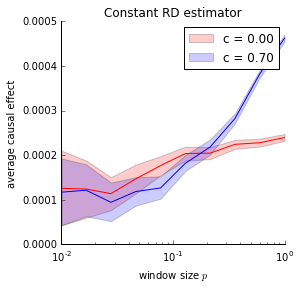

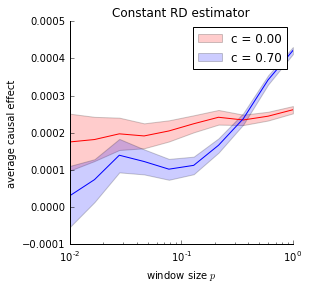

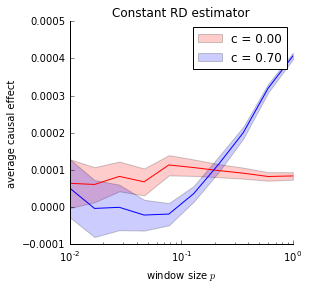

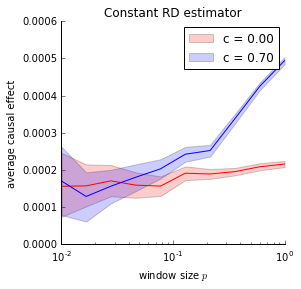

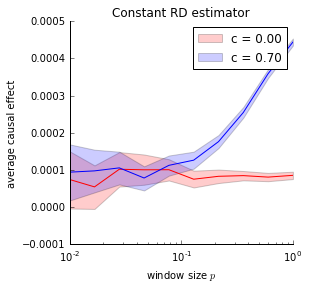

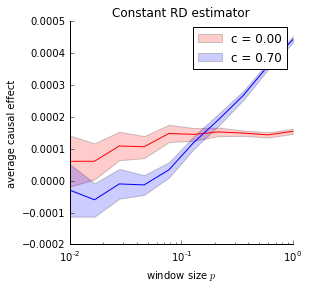

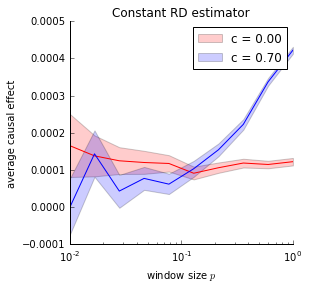

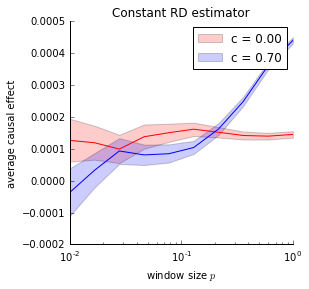

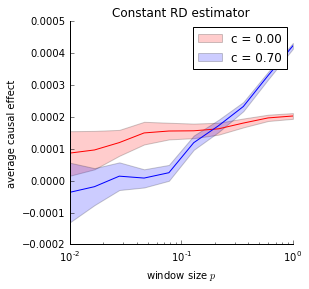

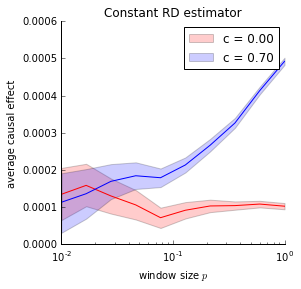

In [6]:
#Plot the causal effects as a function of p
for u in range(10):
    #u = 1
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    #for i in range(len(cvals)):
    #    #sns.tsplot(data = beta_rd_c[i,:,:,u], ax = ax, ci='sd', time=pvals)#, color='C%d'%i)
    #    sns.tsplot(data = beta_rd_c[i,:,:,u], ax = ax, time=pvals)#, color='C%d'%i)
    #    #ax.plot(pvals, m_beta_rd_c[i,-1,u]*ones(pvals.shape), '-.', color='C%d'%i)
    sns.tsplot(data = beta_rd_c[0,:,:,u], ax = ax, time=pvals, color='red')
    sns.tsplot(data = beta_rd_c[1,:,:,u], ax = ax, time=pvals, color='blue')
    #sns.tsplot(data = beta_rd_c_linear[0,:,:,u], ax = ax, time=pvals, color='red')
    #sns.tsplot(data = beta_rd_c_linear[1,:,:,u], ax = ax, time=pvals, color='blue')
    ax.set_xlabel('window size $p$');
    ax.set_ylabel('average causal effect');
    ax.set_title('Constant RD estimator');
    #ax.plot(pvals, beta_sp_c[0,u]*ones(pvals.shape), color=(0,0,0));
    #ax.set_ylim([3, 7])
    #ax.set_ylim([5.4, 5.9])
    #ax.set_xlim([0, 1])
    ax.set_xscale('log')
    #ax.set_yticks([2, 3, 4, 5, 6])
    sns.despine(trim=True)
    ax.legend(["c = %.2f"%i for i in cvals]);
    #plt.savefig('./fig_2a.pdf')

## A. Dependence on $N$ and $c$

In [ ]:
nsims = 5
cvals = np.array([0.01, 0.25, 0.5, 0.75, 0.99])
#cvals = np.array([0.01, 0.25, 0.5])
#Nvals = np.logspace(1, 3, 6, dtype = int)
Nvals = np.logspace(1, 3, 4, dtype = int)

tau_s = 0.020
dt = 0.001
t = 100
sigma = 10
x = 0
p = 0.1
DeltaT = 20

W = np.array([12, 9])

params = ParamsLIF(sigma = sigma)
lif = LIF(params, t = t)
lif.W = W

t_filter = np.linspace(0, 1, 2000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]

#c (correlation between noise inputs)
beta_mse_rd_c = np.zeros((len(cvals), len(Nvals), nsims))
beta_mse_fd_c = np.zeros((len(cvals), len(Nvals), nsims))
beta_mse_bp_c = np.zeros((len(cvals), len(Nvals), nsims))

beta_mse_rd_c_linear = np.zeros((len(cvals), len(Nvals), nsims))
beta_mse_fd_c_linear = np.zeros((len(cvals), len(Nvals), nsims))

In [ ]:
#beta_sp_c = np.zeros((len(cvals), params.n))

target = 0.1
W = 10*np.ones(int(Nvals[-1]))
#W = np.random.randn(int(Nvals[-1]))*5
V = np.random.randn(int(Nvals[-1]))*5

cost = lambda s,a: (np.dot(a[0:len(s)], s) - len(s)*target)**2

#Cost function
#B1 = 1
#B2 = 2
#x = .01
#y = 0.1
#z = 0

#cost = lambda s1, s2: (B1*s1-x)**2 + (z+B2*s2 - B2*(B1*s1-y)**2)**2

In [ ]:
params.c = 0.99
params.n = 10
lif.setup(params)
lif.W = W[0:10]
(v, h, _, _, u) = lif.simulate(DeltaT)

In [ ]:
h.shape
n_units = 10
s = np.zeros(h.shape)
for l in range(10):
    s[l,:] = np.convolve(h[l,:], exp_filter)[0:h.shape[1]]
cost_s = cost(s,V[0:n_units])